## Load dataset 

In [1]:
#import Libraries and load dataset 
import pandas as pd
import numpy as np
from normalization import normalize_corpus
from utils import build_feature_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os 
from normalization import tokenize_text
import re, string, unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
dataset = pd.read_csv(r'/Users/dahli/Desktop/MSBA327/Final Project/WReviews.csv')

#### In this project, the goal is to use text mining extensively to analyze the customer reviews.

We will be using the following techniques to understand various aspects of text mining:

* Exploratory analysis of text data (Review Text) and numerical data to have a general overview of the customers and their  concerns while recommending the product (Recommended IND)
* Classification models that are built based on the review text as the independent variable to predict whether a customer recommends a product

In [6]:
dataset.head()

#rating vs freqeny - histgram (jOEY)
# class imbalance boostrapping (PUNITA)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Positive


In [7]:
sumNullRws = dataset.isnull().sum()
sumNullRws

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Sentiment                     0
dtype: int64

In [8]:

dataset.info()


# ## Data preprocessing

# ###### 1. Dropping null value
# ###### 2. Converting into lower text,
# ###### 3. Removing stop words, punctuations
# ###### 4. Text Normalization : Tokenisation,Stemming, Lamentisation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
Sentiment                  23486 non-null object
dtypes: int64(6), object(6)
memory usage: 2.2+ MB


In [9]:
dataset.dropna(subset=['Review Text'], inplace=True) #review all row without textual review 
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
Sentiment                     0
dtype: int64

## Data Overview

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dahli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.00826
0.00481


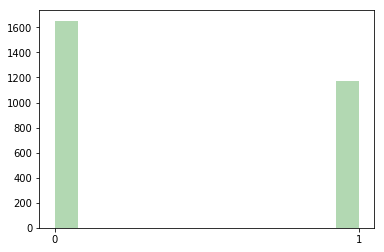

In [11]:
dataset['HRating_NRec'] = np.where((dataset['Rating']> 3) & (dataset['Recommended IND'] == 0), 1 , 0 )
dataset['LRating_Rec'] = np.where((dataset['Rating']<3) & (dataset['Recommended IND'] == 1), 1 , 0 )
print("{0:.5f}".format(dataset[dataset['HRating_NRec'] == 1].shape[0]/dataset.shape[0]))
print("{0:.5f}".format(dataset[dataset['LRating_Rec'] == 1].shape[0]/dataset.shape[0]))
test = dataset[dataset['Rating'] == 3]['Recommended IND']

fig, ax = plt.subplots()
hist = ax.hist(test, bins = 'auto', alpha=0.3, color='g')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))


In [12]:
grouped1=dataset['Rating'].groupby(dataset['Recommended IND']).count()
grouped1

Recommended IND
0     4101
1    18540
Name: Rating, dtype: int64

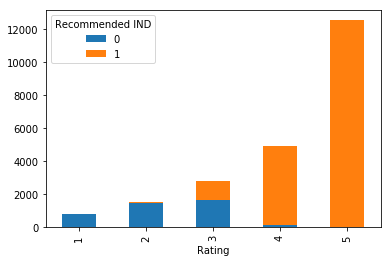

In [13]:
#dsiplaying the data with rating and recommended or not 
dataset.groupby(['Rating','Recommended IND'])['Clothing ID'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

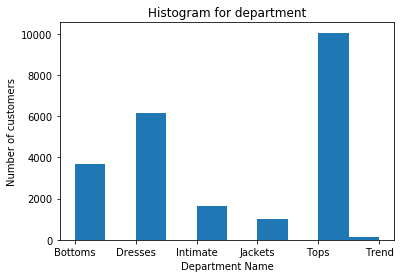

In [14]:
dataset.dropna(subset=['Department Name'], inplace=True)
import matplotlib.pyplot as plt
plt.hist(dataset['Department Name'])
plt.xlabel('Department Name')
plt.ylabel('Number of customers')
plt.title('Histogram for department')
plt.show()

In [15]:
dataset['HighRate'] = np.where(dataset['Rating']> 3,1,0)
print("{0:.5f}".format(dataset[dataset['Rating'] == 5].shape[0]/dataset.shape[0]))

0.55361


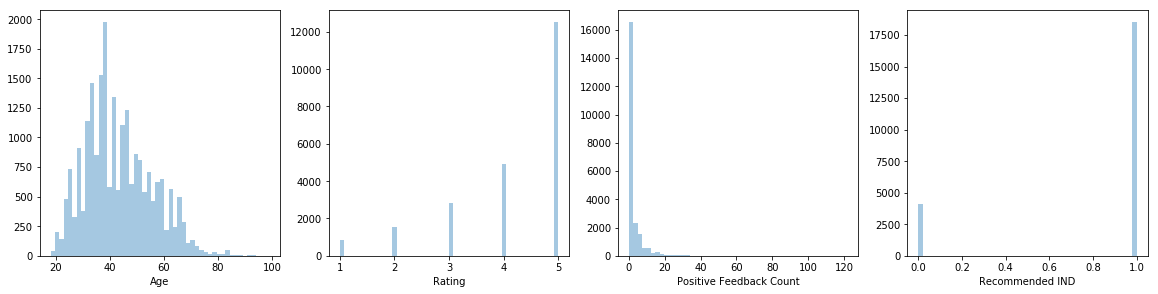

In [16]:
df = dataset[['Age','Rating','Positive Feedback Count','Recommended IND']]
df.head()
#histogram
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index], kde=0, norm_hist=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
def normalize_corpus(corpus, tokenize=False):
    
    normalized_corpus = []    
    for text in corpus:
        text = expand_contractions(text, CONTRACTION_MAP)
        text = [[word.lower() for word in df.split()] for df in text]
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        text = re.sub('[^A-Za-z]+', ' ', text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
            
    return normalized_corpus

from normalization import normalize_corpus

In [20]:
wordcloud=dataset["Review Text"]
all_words= normalize_corpus(wordcloud,tokenize=True,only_text_chars=True)

In [21]:
import itertools
ab=list(itertools.chain(all_words))
word_list=sum(ab, []) 
word_list = nltk.FreqDist(word_list)

In [22]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## Most common words in the reviews

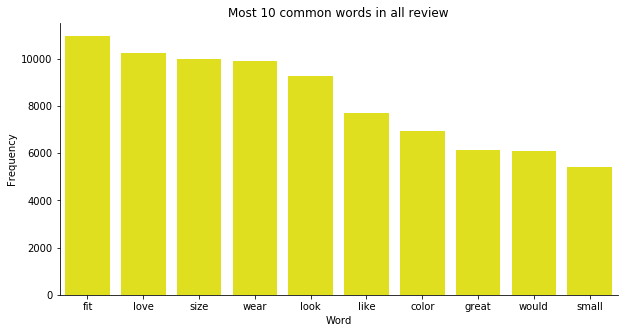

In [23]:
word_df = pd.DataFrame(word_list.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="yellow")
plt.title('Most 10 common words in all review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show(); #we remove the dress and top here

## Wordcloud of the Review Text overall

In [27]:
wordcloudall=' '.join(map(str, all_words))
wordcloudall = wordcloudall.replace("'", "")


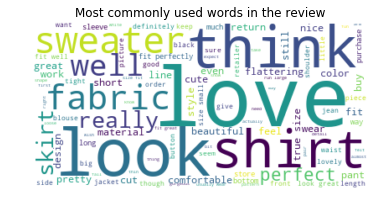

In [28]:

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloudall)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most commonly used words in the review")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Most common words & Wordcloud of the Recommended Review Text (Recommend IND = 1)

In [29]:
#wordcloud for recommended
wordcloud1= dataset.loc[dataset["Recommended IND"]==1,"Review Text"] # recommended text
wordcloud1.head()
all_words1 = normalize_corpus(wordcloud1,tokenize=True,only_text_chars=True) #normalized 

In [30]:
wordcloudall=' '.join(map(str, all_words1))

In [31]:
wordcloudall = wordcloudall.replace("'", "")

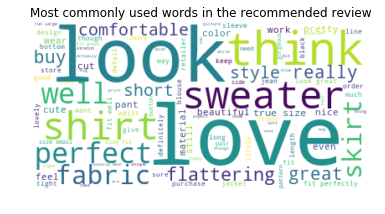

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloudall)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most commonly used words in the recommended review")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [33]:
ab=list(itertools.chain(all_words1))
word_list1=sum(ab, []) 
word_list1 = nltk.FreqDist(word_list1)

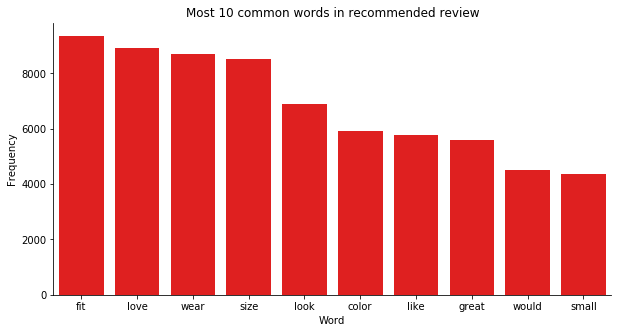

In [34]:

word_df = pd.DataFrame(word_list1.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="red")
plt.title('Most 10 common words in recommended review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Most common words & Wordcloud of the NON-Recommended Review Text (Recommend IND = 0)

In [36]:
#wordcloud for not recommended
wordcloud0= dataset.loc[dataset["Recommended IND"]==0,"Review Text"] # not recommended text
wordcloud0.head()

2     I had such high hopes for this dress and reall...
5     I love tracy reese dresses, but this one is no...
10    Dress runs small esp where the zipper area run...
22    First of all, this is not pullover styling. th...
25    Loved the material, but i didnt really look at...
Name: Review Text, dtype: object

In [37]:
all_words0 = normalize_corpus(wordcloud0,tokenize=True,only_text_chars=True) #normalized 

In [38]:
ab=list(itertools.chain(all_words0))
word_list0=sum(ab, []) 
word_list0 = nltk.FreqDist(word_list0)

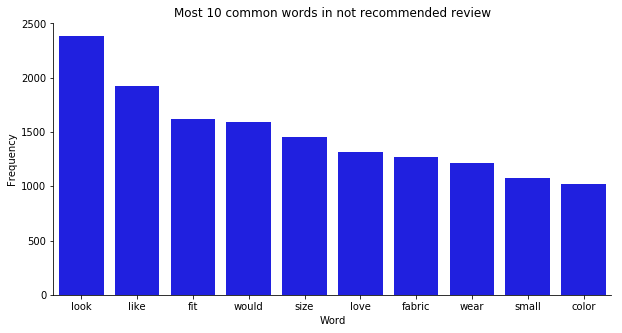

In [39]:
word_df = pd.DataFrame(word_list0.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="blue")
plt.title('Most 10 common words in not recommended review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

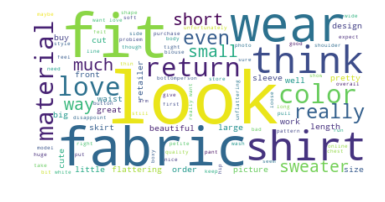

In [40]:
wordcloud0= dataset.loc[dataset["Recommended IND"]==0,"Review Text"] # not recommended text
all_words0 = normalize_corpus(wordcloud0,tokenize=True,only_text_chars=True) #normalized 
wordcloud00=' '.join(map(str, all_words0))
wordcloud00 = wordcloud00.replace("'", "")
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloud00)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Multinomial Naive Bayes Algorithm and SVM with TFIDF

* Used Multinomial Naive Bayes Algorithm and SVM to predict which product has high ratings (Rating  >  3 ) and which has low rating ( smaller than 3 ) ?
* Used Multinomial Naive Bayes Algorithm and SVM to predict which product is recommended and which is not (recommended 1, non-recommended = 0 )?



In [41]:
#Normalization
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [42]:
#test1 = normalize_corpus(X_train,lemmatize=True,only_text_chars=True)
X= dataset['Review Text']
#y = dataset['HighRate']
y = dataset['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.30)

## Extract features - TFIDF

In [43]:
# Extracting features from text files
# Remove the stop words
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
X_train_counts = stemmed_count_vect.fit_transform(X_train)
X_train_counts.shape

(15839, 8273)

In [44]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(15839, 8273)

## Modeling (Multinomial Naive Bayes Algorithm and SVM)

In [45]:
#Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [46]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [47]:
# Performance of NB Classifier

predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.8229488879069082

In [48]:
from utils import display_evaluation_metrics, display_confusion_matrix, display_classification_report
print(display_evaluation_metrics(y_test, predicted))
print(display_classification_report(y_test, predicted))

Accuracy: 0.82
Precision: 0.82
Recall: 1.0
F1 Score: 0.9
None
             precision    recall  f1-score   support

          1       0.82      1.00      0.90      5533
          0       0.94      0.05      0.09      1256

avg / total       0.84      0.82      0.75      6789

None


In [49]:
# Training Support Vector Machines - SVM and calculating its performance
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=500, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.8266313153630873

In [50]:
print(display_evaluation_metrics(y_test, predicted_svm))
print(display_classification_report(y_test, predicted_svm))

Accuracy: 0.83
Precision: 0.82
Recall: 1.0
F1 Score: 0.9
None
             precision    recall  f1-score   support

          1       0.82      1.00      0.90      5533
          0       0.98      0.06      0.12      1256

avg / total       0.85      0.83      0.76      6789

None


## Model tuning

In [51]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}


In [52]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=1) 
gs_clf = gs_clf.fit(X_train, y_train)

In [53]:
# To see the best mean score and the params, run the following code

print(gs_clf.best_score_)
print(gs_clf.best_params_)


0.8638171601742535
{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [54]:
predicted_final = gs_clf.predict(X_test)
print(display_evaluation_metrics(y_test, predicted_final))
print(display_classification_report(y_test, predicted_final))

Accuracy: 0.87
Precision: 0.87
Recall: 0.98
F1 Score: 0.92
None
             precision    recall  f1-score   support

          1       0.87      0.98      0.92      5533
          0       0.83      0.35      0.50      1256

avg / total       0.86      0.87      0.84      6789

None


In [55]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)

In [56]:
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.8363533051328998
{'clf-svm__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [57]:
predicted_svm_f = gs_clf_svm.predict(X_test)
print(display_evaluation_metrics(y_test,predicted_svm_f))
print(display_classification_report(y_test, predicted_svm_f))

Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1 Score: 0.91
None
             precision    recall  f1-score   support

          1       0.83      1.00      0.91      5533
          0       0.94      0.10      0.19      1256

avg / total       0.85      0.83      0.77      6789

None


### Handling Class Imbalance

In [58]:
#Handling Class Imbalance
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

pipeline = make_pipeline_imb(TfidfVectorizer(),
                         RandomUnderSampler(),
                         MultinomialNB())

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.90      0.83      0.68      0.87      0.75      1256
          1       0.97      0.83      0.90      0.90      0.87      0.74      5533

avg / total       0.89      0.84      0.89      0.86      0.87      0.75      6789



In [59]:
from sklearn.linear_model import SGDClassifier
pipeline = make_pipeline_imb(TfidfVectorizer(),
                         RandomUnderSampler(),
                         SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=500, random_state=42))

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
#the geo mean of the SVM model performced better than the MNB model. 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.89      0.84      0.68      0.86      0.74      1256
          1       0.97      0.84      0.89      0.90      0.86      0.74      5533

avg / total       0.89      0.84      0.88      0.86      0.86      0.74      6789



## Sentiment Analysis 

In [60]:
# Rating > 3: Positive
# Rating < 3: Negative

Rating= dataset['Rating']
Sentiment=[]
for i in Rating:
    if i > 3: 
        Sentiment.append('Positive')
    elif i < 3: 
        Sentiment.append('Negative')
    else:
        Sentiment.append('Neutral')

#Added Sentiment to dataset
dataset['Sentiment'] = Sentiment

### Grpahs

1. postive negative sentiment by each for each department: to know which department needs urgent attention
2. Most common words used in Negative 
3. Find most correlated words
4. How people are finding useful information from postive and negative reviews

###  postive negative sentiment by each for each department and Class

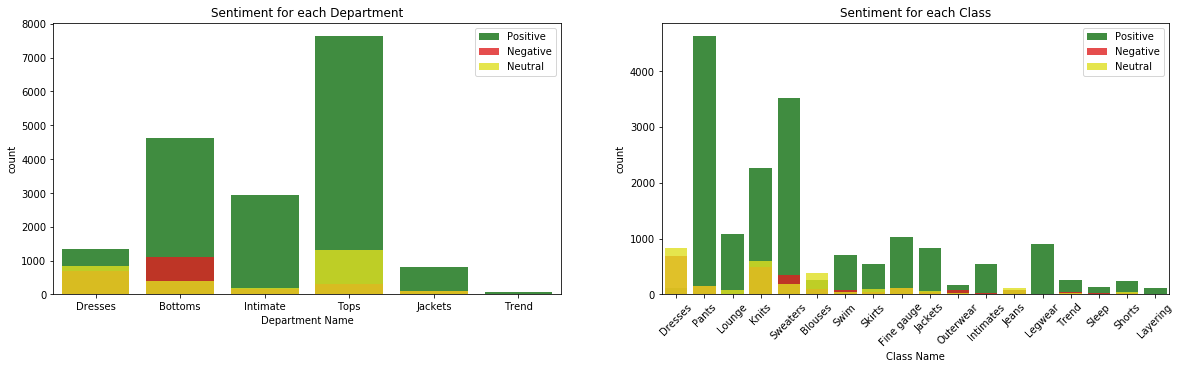

In [63]:
#1.
Positive = dataset[dataset['Sentiment']=='Positive']
Negative = dataset[dataset['Sentiment']=='Negative']
Neutral = dataset[dataset['Sentiment']=='Neutral']

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1 = sns.countplot(Positive['Department Name'], color = "green", alpha = 0.8, label = "Positive")
ax1 = sns.countplot(Negative['Department Name'], color = "red", alpha = 0.8, label = "Negative")
ax1 = sns.countplot(Neutral['Department Name'], color = "yellow", alpha = 0.8, label = "Neutral")
ax1 = plt.title("Sentiment for each Department")
ax1 = plt.legend()

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=2)
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(Positive['Class Name'], color = "green", alpha = 0.8, label = "Positive")
ax2 = sns.countplot(Negative['Class Name'], color = "red", alpha = 0.8, label = "Negative")
ax2 = sns.countplot(Neutral['Class Name'], color = "yellow", alpha = 0.8, label = "Neutral")
ax2 = plt.title("Sentiment for each Class")
ax2 = plt.legend()
plt.show()

#Bottom department needs urgent attention as it has highest negative reviews.
#Dress and top department have more neutral it may need more attention. let see what are most coomon words mentioned in dress.

### 4. Sentiment by recommended ID
* Recommended is a strong indicator for positive sentiment in the review.

In [65]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

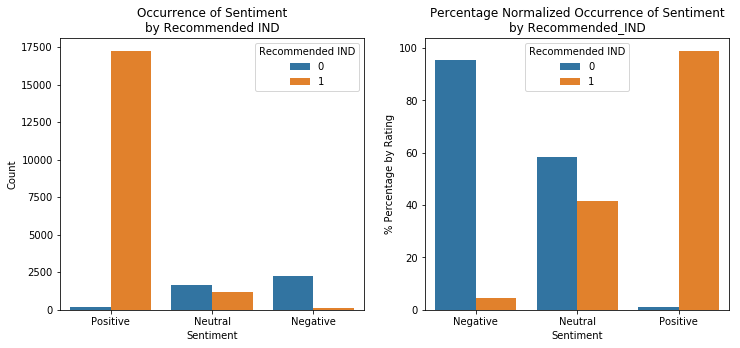

In [67]:
huevar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Sentiment", hue="Recommended IND",data=dataset, ax=axes[0])
axes[0].set_title("Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x="Sentiment",y="Percentage", hue="Recommended IND",data=dataset, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurrence of {}\nby {}".format(huevar, "Recommended_IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

### Create word cloud for Ngeative and neutral review for dress

In [69]:
#2.
senti_p=['Positive']
senti_n=['Negative']
senti_ne=['Neutral']

Class_1=['Bottoms']
Class=['Dresses']
Class_2=['Tops']

Negative_dress=dataset[dataset['Class Name'].isin(Class)&dataset.Sentiment.isin(senti_n)]
Neurtral_dress=dataset[dataset['Class Name'].isin(Class)&dataset.Sentiment.isin(senti_ne)]
pos_dress=dataset[dataset['Class Name'].isin(Class)&dataset.Sentiment.isin(senti_p)]

Negative_bottom=dataset[dataset['Department Name'].isin(Class_1)&dataset.Sentiment.isin(senti_n)]
Neurtral_bottom=dataset[dataset['Department Name'].isin(Class_1)&dataset.Sentiment.isin(senti_ne)]
pos_bottom=dataset[dataset['Department Name'].isin(Class_1)&dataset.Sentiment.isin(senti_p)]

Negative_Tops=dataset[dataset['Department Name'].isin(Class_2)&dataset.Sentiment.isin(senti_n)]
Neurtral_Tops=dataset[dataset['Department Name'].isin(Class_2)&dataset.Sentiment.isin(senti_ne)]
pos_Tops=dataset[dataset['Department Name'].isin(Class_2)&dataset.Sentiment.isin(senti_p)]

#dress=Negative_dress['Review_Text'] # recommended text
#all_words_dress = normalize_corpus(dress,tokenize=True,only_text_chars=True) #normalized 

In [70]:
import re

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))   
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater','dresses', 'shirt','bottom', 'pant','pants', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x_n= [i for i in rating]
    y_n= ' '.join(x_n)
    cloud = WordCloud(background_color='white',width=1200, height=400,max_words=100,stopwords= stopwords).generate(y_n)
    plt.figure(figsize=(10,7.5))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

Word Cloud for Negative Review of Dress


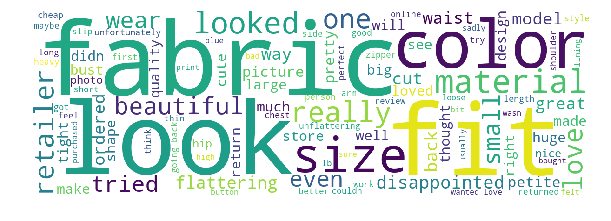

In [72]:
print('\033[1m'+"Word Cloud for Negative Review of Dress")  
dressn= Negative_dress['Review Text'].apply(clean_data)
create_cloud(dressn)

Word Cloud for Neutral Review of Dress


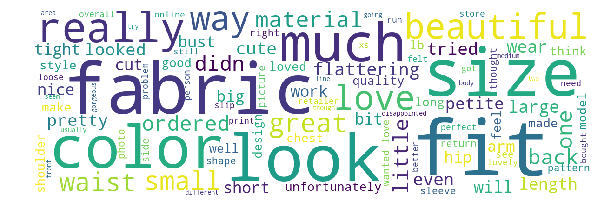

In [73]:
print('\033[1m'+"Word Cloud for Neutral Review of Dress") 
neutral_dress= Neurtral_dress['Review Text'].apply(clean_data)
create_cloud(neutral_dress)

Word Cloud for Positive Review of Dress


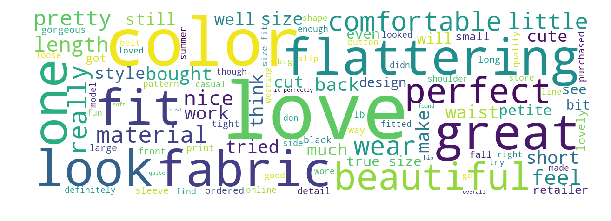

In [74]:
print('\033[1m'+"Word Cloud for Positive Review of Dress") 
p_dress= pos_dress['Review Text'].apply(clean_data)
create_cloud(p_dress)

#### Check Group Balance

In [75]:
#Checking group balance
grouped=dataset['Rating'].groupby(dataset['Sentiment']).count()
grouped

Sentiment
Negative     2370
Neutral      2823
Positive    17435
Name: Rating, dtype: int64

In [76]:
target=[]
for i in Rating:
    if i > 3: 
        target.append(1)
    elif i < 3: 
        target.append(0)
    else:
        target.append(2)

In [77]:
#Added Sentiment to dataset
dataset['target'] = target

In [78]:
# X, Y , train and test split with Sentiment-string as target 
RANDOM_STATE=42
X = np.array(dataset['Review Text'])
y = np.array(dataset['Sentiment'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=RANDOM_STATE)

In [79]:
# X, Y , train and test split with Sentiment Numeric value as target

X1 = np.array(dataset['Review Text'])
y1 = np.array(dataset['target'])
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.30,random_state=RANDOM_STATE)

In [80]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15839,), (6789,), (15839,), (6789,))

In [82]:
# Normalize the train and test reviews

norm_train_reviews = normalize_corpus(X_train,lemmatize=True,only_text_chars=True)
norm_test_reviews = normalize_corpus(X_test,lemmatize=True,only_text_chars=True)
len(norm_train_reviews)

15839

In [83]:
#Before Balancing the class
pipe = make_pipeline_imb(TfidfVectorizer(),
                         MultinomialNB())
# Train the classifier with balancing
pipe.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred = pipe.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

   Negative       0.00      0.00      1.00      0.00      0.00      0.00       713
    Neutral       0.00      0.00      1.00      0.00      0.00      0.00       830
   Positive       0.77      1.00      0.00      0.87      0.00      0.00      5246

avg / total       0.60      0.77      0.23      0.67      0.00      0.00      6789



### Evaluate performance of traditional algorithm 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):  
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [86]:
#feature extraction
vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
                                                  feature_type='tfidf',
                                                  ngram_range=(1, 1), 
                                                  min_df=0.0, max_df=1.0)   

In [87]:
# build the model
svm = SGDClassifier(loss='hinge', max_iter=500)
svm.fit(train_features, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [88]:
#Test review feature extraction
test_features = vectorizer.transform(norm_test_reviews)

In [89]:
#Predict Test reviews
predicted_sentiments = svm.predict(test_features)

In [90]:
from utils import display_evaluation_metrics, display_confusion_matrix, display_classification_report
from sklearn import metrics

In [91]:
def  display_evaluation_metrics(true_labels, predicted_labels, positive_class=1): ## Corrected for Multiclass
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    
                                              
def display_classification_report(true_labels, predicted_labels, target_names=['Positive', 'Negative','Neutral']):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=target_names) 
    print(report)

In [92]:
print("SVM Classifier:")
display_evaluation_metrics(true_labels=y_test,
                           predicted_labels=predicted_sentiments,
                          positive_class='Positive')  
                           
cm = metrics.confusion_matrix(y_test, predicted_sentiments,labels=['Positive', 'Negative','Neutral'])
Confusion_m = pd.DataFrame(cm,index=['Positive', 'Negative','Neutral'],columns=['Positive', 'Negative','Neutral'])
print(Confusion_m)                         

display_classification_report(true_labels=y_test,
                              predicted_labels=predicted_sentiments,
                              target_names=['Positive', 'Negative','Neutral'])  

SVM Classifier:
Accuracy: 0.81
Precision: 0.77
Recall: 0.81
F1 Score: 0.77
          Positive  Negative  Neutral
Positive      5151        72       23
Negative       343       335       35
Neutral        596       190       44
             precision    recall  f1-score   support

   Positive       0.85      0.98      0.91      5246
   Negative       0.56      0.47      0.51       713
    Neutral       0.43      0.05      0.09       830

avg / total       0.77      0.81      0.77      6789



Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In our case minority class is also of great interest hence it is desirable to have better precision and recall measure for Negative class. We will deal with imbalanced data with randomundersampling.

In [93]:
#Handling Class Imbalance
from imblearn.pipeline import make_pipeline
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler


### Model Bulding (with radomundersampler )and model Tunning

In [94]:
from nltk.stem import WordNetLemmatizer
from html.parser import HTMLParser
import unicodedata
# Grid Search method was time consuming hence we manully changed hyperparameter to achieve better accuracy socre.

# Model building with SVM

text_clf_svm = make_pipeline_imb((TfidfVectorizer(ngram_range=(1,2))),RandomUnderSampler(),
                         (SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter =50, random_state=42)))
text_clf= text_clf_svm.fit(norm_train_reviews,y_train)
predicted_svm = text_clf.predict(norm_test_reviews)
np.mean(predicted_svm == y_test)

0.7915746059802622

In [95]:
# Model building with NB

text_clf_nb = make_pipeline_imb((TfidfVectorizer(ngram_range=(1,2))),RandomUnderSampler(),
                         (MultinomialNB()))

text_clf_nb= text_clf_nb.fit(norm_train_reviews, y_train)
predicted_nb = text_clf_nb.predict(norm_test_reviews)
np.mean(predicted_nb == y_test)

0.7093828251583444

### Evaluate the performance of unbalanced algorithm

In [96]:
#Evaluation Metrics function
def  display_evaluation_metrics(true_labels, predicted_labels, positive_class=1): ## Corrected for Multiclass
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    
                                              
def display_classification_report(true_labels, predicted_labels, target_names=['Positive', 'Negative','Neutral']):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=target_names) 
    print(report)

In [97]:
#Print Evaluaition metric with SVM
print('SVM Classifier:')
display_evaluation_metrics(true_labels=y_test,
                           predicted_labels=predicted_svm,
                          positive_class='Positive')  
                           
cm = metrics.confusion_matrix(y_test, predicted_svm,labels=['Positive', 'Negative','Neutral'])
Confusion_m = pd.DataFrame(cm,index=['Positive', 'Negative','Neutral'],columns=['Positive', 'Negative','Neutral'])
print(Confusion_m)                         

display_classification_report(true_labels=y_test,
                              predicted_labels=predicted_svm,
                              target_names=['Positive', 'Negative','Neutral'])  

SVM Classifier:
Accuracy: 0.79
Precision: 0.8
Recall: 0.79
F1 Score: 0.79
          Positive  Negative  Neutral
Positive      4695       259      292
Negative       141       459      113
Neutral        294       316      220
             precision    recall  f1-score   support

   Positive       0.92      0.89      0.90      5246
   Negative       0.44      0.64      0.53       713
    Neutral       0.35      0.27      0.30       830

avg / total       0.80      0.79      0.79      6789



In [98]:
#Print Evaluaition metric with NB
print('NB Classifier:')
display_evaluation_metrics(true_labels=y_test,
                           predicted_labels=predicted_nb,
                          positive_class='Positive')  
                           
cm = metrics.confusion_matrix(y_test, predicted_nb,labels=['Positive', 'Negative','Neutral'])
Confusion_m = pd.DataFrame(cm,index=['Positive', 'Negative','Neutral'],columns=['Positive', 'Negative','Neutral'])
print(Confusion_m)                         

display_classification_report(true_labels=y_test,
                              predicted_labels=predicted_nb,
                              target_names=['Positive', 'Negative','Neutral'])  

NB Classifier:
Accuracy: 0.71
Precision: 0.83
Recall: 0.71
F1 Score: 0.75
          Positive  Negative  Neutral
Positive      3934       214     1098
Negative        34       376      303
Neutral        105       219      506
             precision    recall  f1-score   support

   Positive       0.97      0.75      0.84      5246
   Negative       0.46      0.53      0.49       713
    Neutral       0.27      0.61      0.37       830

avg / total       0.83      0.71      0.75      6789



### Geometric Mean of SVM and NB

In [99]:
from imblearn.metrics import geometric_mean_score
print('SVM: The geometric mean is {}'.format(geometric_mean_score(y_test,predicted_svm)))
print('NB: The geometric mean is {}'.format(geometric_mean_score(y_test,predicted_nb)))

SVM: The geometric mean is 0.534513097543949
NB: The geometric mean is 0.6223847406710885


In [100]:
from collections import Counter
# Checking of class distribution in train and test data before applying RandomUndersampling 
print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_test)))

Training class distributions summary: Counter({'Positive': 12189, 'Neutral': 1993, 'Negative': 1657})
Test class distributions summary: Counter({'Positive': 5246, 'Neutral': 830, 'Negative': 713})
